# Financial Modeling Regression Analysis

Regression Analysis represents the relationship between a dependent (target) variable and one or more independent variables.

In financial modeling, we can use single regression analysis to estimate the strength of the independent variable(s) on the target variable(s) and forecase future trends. This works in settings where we can hypothesize a correlation between the target and independent variables.

Regression analysis is a form of predictive analysis.

## Data loading and preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
df = pd.read_excel('weekly_sales.xlsx')


In [3]:
# Create the 'Year-Week' column by concatenating 'Year' and 'Week'
df['Year-Week'] = df['Year'].astype(str) + '-' + df['Week'].astype(str)

# Convert the 'Year-Week' column to a pandas DateTimeIndex
df['Year-Week'] = pd.to_datetime(df['Year-Week'] + '-1', format='%Y-%W-%w')
df.set_index('Year-Week', inplace=True)


            Year  Week         Sales  ad_clicks
Year-Week                                      
2019-01-07  2019     1  8.571254e+05        445
2019-01-14  2019     2  3.584899e+05        373
2019-01-21  2019     3  1.779398e+06       1204
2019-01-28  2019     4  6.922397e+05        406
2019-02-04  2019     5  1.079121e+06        946
...          ...   ...           ...        ...
2020-12-07  2020    49  1.410984e+06       1138
2020-12-14  2020    50  1.675462e+06       1356
2020-12-21  2020    51  1.267679e+06        662
2020-12-28  2020    52  1.185276e+06        703
2021-01-04  2020    53  6.641885e+05        276

[106 rows x 4 columns]


In [6]:
# Check if null values appear in any column
if df.isnull().any().any():
    print("Null values appear in the DataFrame.")
else:
    print("No null values in the DataFrame.")


No null values in the DataFrame.


In [7]:

# Display the updated DataFrame
print(df)


            Year  Week         Sales  ad_clicks
Year-Week                                      
2019-01-07  2019     1  8.571254e+05        445
2019-01-14  2019     2  3.584899e+05        373
2019-01-21  2019     3  1.779398e+06       1204
2019-01-28  2019     4  6.922397e+05        406
2019-02-04  2019     5  1.079121e+06        946
...          ...   ...           ...        ...
2020-12-07  2020    49  1.410984e+06       1138
2020-12-14  2020    50  1.675462e+06       1356
2020-12-21  2020    51  1.267679e+06        662
2020-12-28  2020    52  1.185276e+06        703
2021-01-04  2020    53  6.641885e+05        276

[106 rows x 4 columns]


In [8]:
print(f"Number of rows in dataset: {df.shape[0]}\n"
f"Number of columns in dataset: {df.shape[1]}")

Number of rows in dataset: 106
Number of columns in dataset: 4


## Descriptive Statistics

In [78]:
df.describe()

,Year,Week,Sales,ad_clicks
count,106.00,106.00,106.00,106.00
mean,2019.50,27.00,1069450.36,694.41
std,0.50,15.37,502719.24,348.42
min,2019.00,1.00,151151.77,60.00
25%,2019.00,14.00,727872.49,457.50
50%,2019.50,27.00,992238.76,626.00
75%,2020.00,40.00,1267772.33,864.25
max,2020.00,53.00,3180019.29,2165.00


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106 entries, 2019-01-07 to 2021-01-04
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       106 non-null    int64  
 1   Week       106 non-null    int64  
 2   Sales      106 non-null    float64
 3   ad_clicks  106 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 4.1 KB


## EDA

- Ho: There is no significant relationship between ad_clicks and sales. The level of ad_clicks does not have a substantial impact on sales.
- Ha: There is a significant positive relationship between ad_clicks and sales. An increase in ad_clicks is expected to result in a corresponding increase in sales.

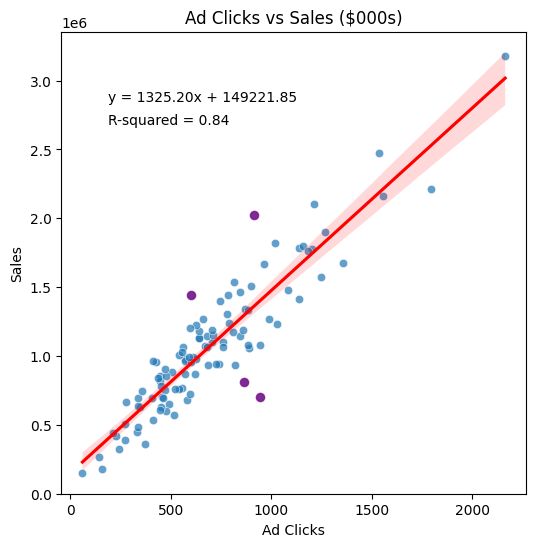

In [90]:
# Set the plot size
plt.figure(figsize=(6, 6))

# Create the scatter plot with trend line
sns.scatterplot(data=df, x='ad_clicks', y='Sales', alpha=0.7)

# Fit the regression model using statsmodels
X = sm.add_constant(df['ad_clicks'])
y = df['Sales']
model = sm.OLS(y, X)
results = model.fit()

# Calculate the residuals
residuals = results.resid

# Define the threshold for potential outliers based on the standard deviation of residuals
threshold = 2 * np.std(residuals)

# Identify potential outliers based on residuals
potential_outliers = df[np.abs(residuals) > threshold]

# Plot potential outliers in purple color
plt.scatter(potential_outliers['ad_clicks'], potential_outliers['Sales'], alpha=0.7, color='purple')

sns.regplot(data=df, x='ad_clicks', y='Sales', scatter=False, line_kws={'linestyle':'-', 'color':'red'})

# Add labels and title
plt.xlabel('Ad Clicks')
plt.ylabel('Sales')
plt.title('Ad Clicks vs Sales ($000s)')

# Get the coefficients of the trend line
m = results.params['ad_clicks']
b = results.params['const']

# Calculate the R-squared value
r_squared = results.rsquared

# Display the equation of the line and R-squared value
equation = f'y = {m:.2f}x + {b:.2f}'
r_squared_text = f'R-squared = {r_squared:.2f}'

plt.text(0.1, 0.85, equation, transform=plt.gca().transAxes)
plt.text(0.1, 0.80, r_squared_text, transform=plt.gca().transAxes)

# Display the plot
plt.show()




The scatterplot illustrates the relationship between the number of ad clicks and sales revenue. Each dot represents a specific observation from the dataset. The x-axis represents the number of ad clicks, and the y-axis represents the corresponding sales revenue.

The scatterplot reveals a generally positive trend, suggesting that as the number of ad clicks increases, sales revenue tends to increase as well. The red line represents the linear regression trend line, which provides an estimate of the overall relationship between ad clicks and sales.

Among the observations, there are four points marked in purple, indicating potential outliers. These observations appear to deviate significantly from the overall trend, with unusually low sales revenue compared to the expected value based on the number of ad clicks. These points may represent unique or unusual circumstances that require further investigation.

It's important to note that while the scatterplot provides insights into the relationship between ad clicks and sales, it does not establish causation. Other factors, such as product quality, pricing, or market conditions, could also influence sales revenue.

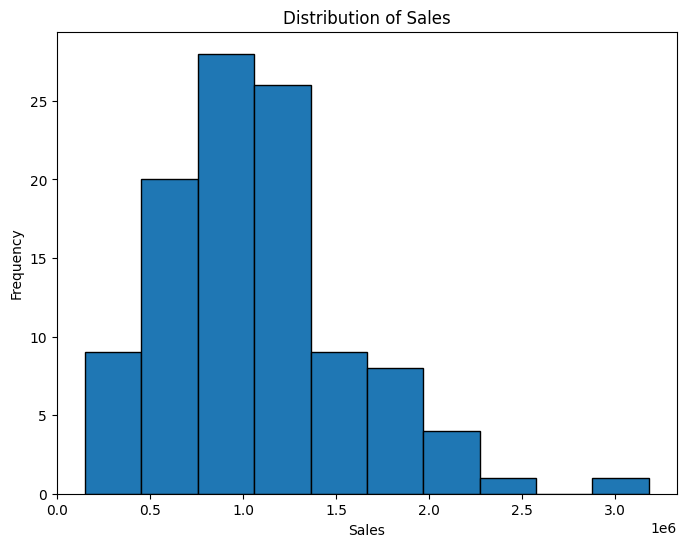

In [74]:
import matplotlib.pyplot as plt

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Sales'], bins=10, edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Sales')
plt.show()


The histogram provides insights into the distribution of sales in the dataset. The x-axis represents the sales values, while the y-axis represents the frequency or count of observations falling within each bin.

From the histogram, we observe a right-skewed distribution with a tail on the higher sales values. This indicates that the majority of sales values are concentrated towards the lower end, while there are relatively fewer instances of higher sales values.

The histogram is divided into 10 bins, each representing a range of sales values. The bin values indicate the number of observations that fall within each bin. For example, Bin 1 has 9 observations, Bin 2 has 20 observations, Bin 3 has 28 observations, and so on.

Overall, the histogram suggests that there are more instances of lower sales values, while higher sales values are less frequent. This information can be useful for understanding the distribution of sales and identifying any potential patterns or outliers in the data.

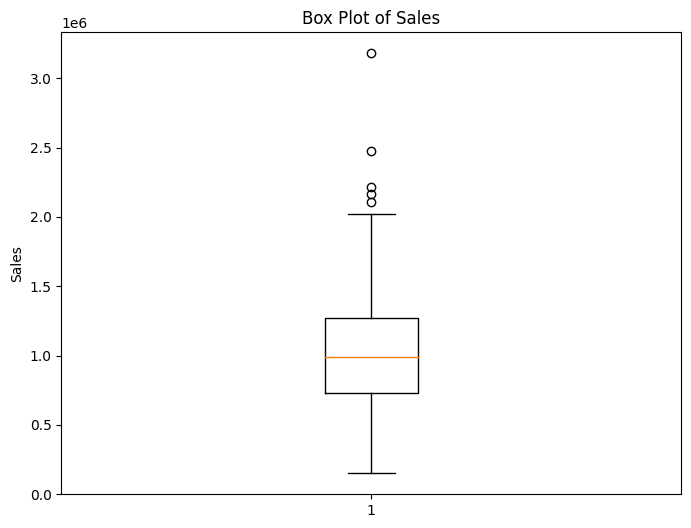

In [75]:

# Box Plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'])
plt.ylabel('Sales')
plt.title('Box Plot of Sales')
plt.show()


In the boxplot of sales, there are several outliers positioned above the top whisker, indicating sales values that deviate significantly from the majority of the data. Of particular interest are the dots located at 3.0 and 2.5 on the y-axis.

The dot positioned at 3.0 represents an observation with a considerably higher sales value. Its presence suggests a potential outlier that stands out due to its magnitude, indicating a substantial deviation from the typical sales values observed in the dataset.

Similarly, the dot positioned at 2.5 denotes another outlier with a relatively high sales value. While not as extreme as the dot at 3.0, it still signifies a significant deviation from the majority of the data points.

These outliers, including the dots at 3.0 and 2.5, merit further investigation in order to understand the underlying reasons for their exceptional sales values. Exploring these observations may reveal important insights into factors that contribute to exceptionally high sales performance, which could be valuable for academic analysis and decision-making.

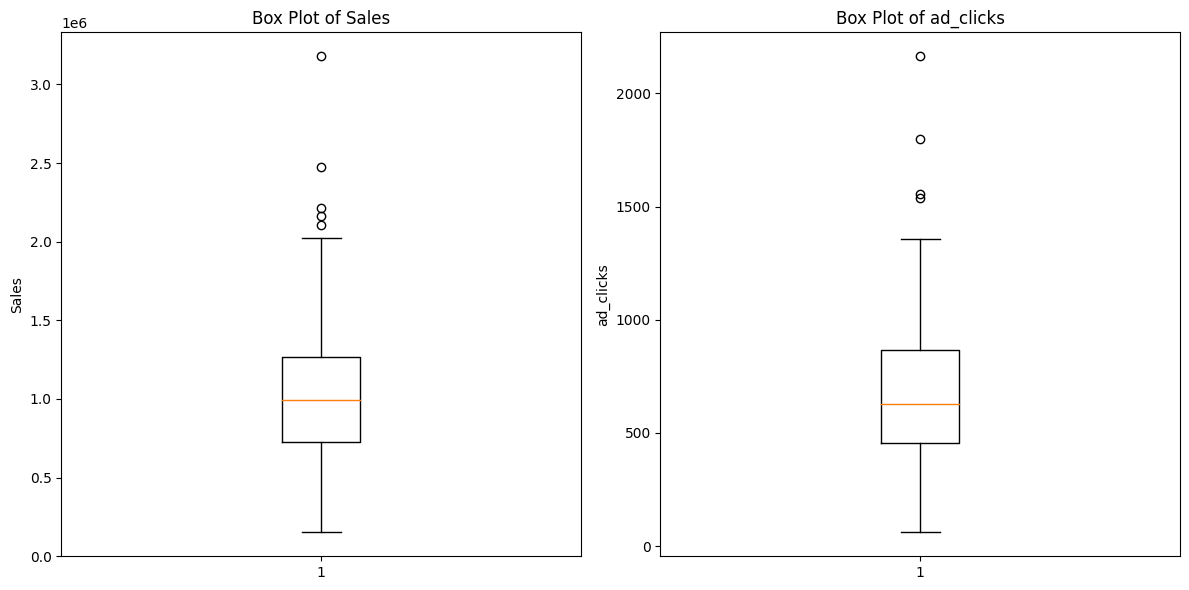

In [76]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box Plot for Sales
axes[0].boxplot(df['Sales'])
axes[0].set_ylabel('Sales')
axes[0].set_title('Box Plot of Sales')

# Box Plot for ad_clicks
axes[1].boxplot(df['ad_clicks'])
axes[1].set_ylabel('ad_clicks')
axes[1].set_title('Box Plot of ad_clicks')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


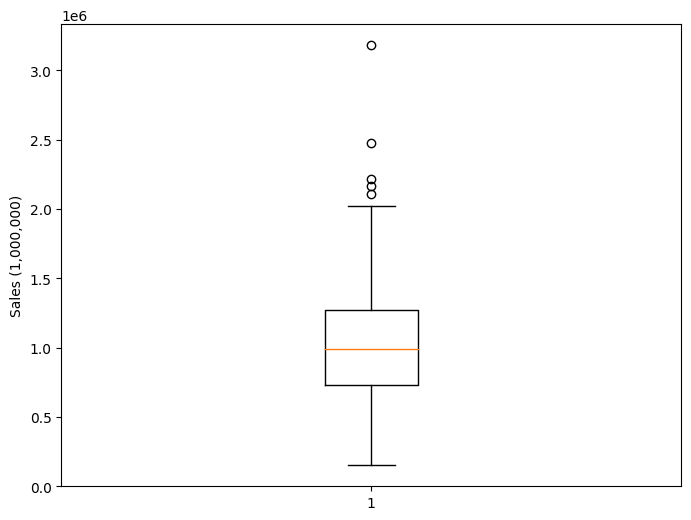

In [85]:
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Sales'])

# Modify the y-axis label
plt.ylabel('Sales (1,000,000)')  # Modify the label to desired format

# Show the plot
plt.show()


The equation of the line suggests that, based on the intercept, we should expect $150k in weekly sales if we have 0 ad clicks, on average. The slope indicates an expected generation of about $1325 in reveune for each addional ad click.

Covariance and Correlation Matrices

In [37]:
# Calculate the covariance matrix
cov_matrix = df[['ad_clicks', 'Sales']].cov()

# Calculate the correlation matrix
corr_matrix = df[['ad_clicks', 'Sales']].corr()

print("Covariance Matrix:")
print(cov_matrix)
print("\nCorrelation Matrix:")
print(corr_matrix)


Covariance Matrix:
              ad_clicks         Sales
ad_clicks  1.213995e+05  1.608790e+08
Sales      1.608790e+08  2.527266e+11

Correlation Matrix:
           ad_clicks     Sales
ad_clicks   1.000000  0.918471
Sales       0.918471  1.000000


The covariance between 'ad_clicks' and 'Sales' is approximately 121,399.501. This value represents the extent of the linear relationship between the two variables. A positive covariance indicates a positive linear relationship. The magnitude of the covariance indicates the strength of the relationship.

The correlation coefficient between 'ad_clicks' and 'Sales' is approximately 0.918. This value measures the strength and direction of the linear relationship between the two variables.

Based on the interpretation, there is a positive linear relationship between 'ad_clicks' and 'Sales'. The high correlation coefficient of 0.918 indicates a strong positive association, suggesting that as the number of ad clicks increases, the sales also tend to increase.

## Model Instantiation

In [37]:
# Specify the training size as 80% of the data
train_size = 0.8

# Split the data into train and test sets
train_data, test_data = train_test_split(df, train_size=train_size, shuffle=False)

# Define the features (X) and target variable (y) for training and testing sets
X_train = train_data[['ad_clicks']]
y_train = train_data['Sales']
X_test = test_data[['ad_clicks']]
y_test = test_data['Sales']


In [61]:
import statsmodels.api as sm

# Add a constant column to the independent variable matrix
X_train = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X_train)
results = model.fit()

# Print the model summary report
print(results.summary())




                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     559.8
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           2.17e-38
Time:                        13:34:41   Log-Likelihood:                -1140.6
No. Observations:                  84   AIC:                             2285.
Df Residuals:                      82   BIC:                             2290.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.167e+05   4.53e+04      2.575      0.0

Here's the interpretation of the key statistics presented in the Summary Statistics table:

1. R-squared: The R-squared value is 0.872, indicating that approximately 87% of the variation in the dependent variable (Sales) can be explained by the independent variable (ad_clicks). This indicates a reasonably good fit of the model.

2. Coefficients: The coefficient for the intercept (Intercept) is 131,800 and for ad_clicks is 1385.98. These coefficients represent the estimated effect of the corresponding variables on the Sales. In this case, the intercept represents the expected Sales when the ad_clicks is zero. The coefficient for ad_clicks suggests that, on average, a one-unit increase in ad_clicks is associated with an increase in Sales by approximately 1325.2031 units.

3. Standard Errors and t-statistics: The standard errors provide an indication of the variability of the coefficient estimates. The t-statistics (t) measure the number of standard deviations by which the estimated coefficient differs from zero. In this case, both the Intercept and ad_clicks have positive t-statistics greater than 2, indicating that the coefficients are statistically significant.

4. p-values: The p-values for both the Intercept and ad_clicks are very small (p < .01>), indicating strong evidence against the null hypothesis that the coefficients are zero and that independent variable, ad_clicks is statistically significant.

5. F-statistic: The F-statistic tests the overall significance of the regression model. In this case, the F-statistic is 559.8, and the associated p-value is very small, indicating that the model as a whole is statistically significant.

Overall, the regression model demonstrates a statistically significant relationship between ad_clicks and Sales. The coefficient estimates provide insights into the direction and magnitude of this relationship, indicating that an increase in ad_clicks is associated with an increase in Sales.

In [62]:
# Get the regression statistics
regression_stats = results.summary().tables[1]
print(regression_stats)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.167e+05   4.53e+04      2.575      0.012    2.65e+04    2.07e+05
ad_clicks   1385.9765     58.579     23.660      0.000    1269.445    1502.508


    t-values and p-values:
        The t-values and their corresponding p-values are used to evaluate the significance of the individual coefficients in the linear regression model.
        In your case, the constant term (intercept) has a t-value of 2.575 and the "ad_clicks" variable has a t-value of 23.662.
        The p-values associated with both variables are very low, indicating strong evidence against the null hypothesis (that the coefficient is zero).
        Since the p-values are less than 0.05, a commonly used significance level, you can conclude that both the constant term and the "ad_clicks" variable have a statistically significant impact on the sales outcome.

Overall, based on the F-statistic and the low p-values for the constant and "ad_clicks" variable, you can interpret that the linear regression model is significant, and the "ad_clicks" variable has a strong and positive influence on the sales outcome.

## Test the model

In [63]:
X_test = sm.add_constant(X_test)


y_pred = results.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")




RMSE: 228191.00211151983


In [66]:

import statsmodels.api as sm
import pandas as pd

# Add a constant column to the test data
X_test = sm.add_constant(X_test)

# Use the fitted model to predict the values on the test data
predicted_values_test = results.predict(X_test)

# Create a new DataFrame combining the actual values and predicted values
results_test = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values_test})

# Print the OLS Regression results summary for the test data
ols_model_test = sm.OLS(y_test, X_test)
results_summary_test = ols_model_test.fit()
print(results_summary_test.summary())





                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     44.14
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           1.81e-06
Time:                        13:36:54   Log-Likelihood:                -298.70
No. Observations:                  22   AIC:                             601.4
Df Residuals:                      20   BIC:                             603.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.647e+05   1.16e+05      3.141      0.0

The R-squared value for the test data appears significantly lower than the R-squared value for the training data. This could indicate that the model may not generalize well to unseen data. A drop in R-squared suggests that the model is not able to capture the underlying patterns and relationships in the test data as effectively as it did in the training data.

A lower R-squared value in the test data could be an indication of overfitting, where the model has learned the noise and specific patterns in the training data too well, but fails to generalize to new data. It may be necessary to revisit the model selection, feature engineering, or consider other techniques to improve the model's performance on unseen data.


 The p-value is less than the chosen alpha level of 0.05, providing strong evidence to reject the null hypothesis. This indicates that there is a significant difference between the groups defined by ad_clicks in terms of their effect on Sales, at a confidence level of 95%.


In [67]:
import pandas as pd

# Create a new DataFrame combining the actual and predicted values
results_test = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values_test})

# Print the DataFrame
print(results_test)



               Actual  Predicted
Year-Week                       
2020-08-10 1153315.03 1099358.61
2020-08-17 1235098.76 1540099.14
2020-08-24  443127.13  410528.29
2020-08-31 1475349.62 1621871.75
2020-09-07 1191352.33 1307255.09
2020-09-14  942411.55 1120148.26
2020-09-21  700401.33 1425063.09
2020-09-28  638820.85  585161.33
2020-10-05 1200408.09  945515.22
2020-10-12 1668443.41 1450010.67
2020-10-19  479997.40  585161.33
2020-10-26 1067410.41 1170043.42
2020-11-02  991807.54  938585.34
2020-11-09 1305316.83 1194990.99
2020-11-16 1332825.57 1340518.52
2020-11-23  841063.99  719601.05
2020-11-30  936232.50 1064709.20
2020-12-07 1410984.25 1693942.53
2020-12-14 1675461.89 1996085.41
2020-12-21 1267678.89 1034217.72
2020-12-28 1185275.96 1091042.75
2021-01-04  664188.46  499230.79


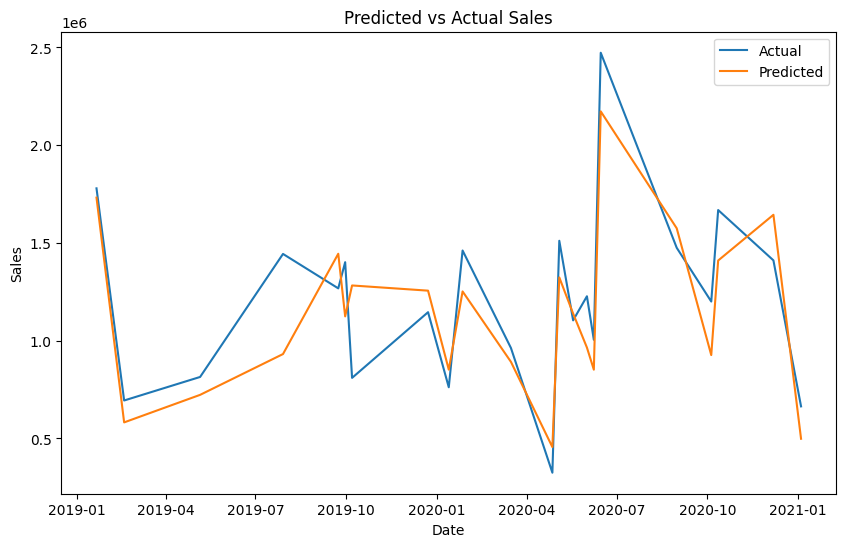

In [68]:
import matplotlib.pyplot as plt

# Create a new dataframe to store the predicted and actual values
results = pd.DataFrame(index=test_df.index)
results['Actual'] = test_df['Sales']
results['Predicted'] = predicted_values

# Sort the index in ascending order
results.sort_index(inplace=True)

# Plotting the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted vs Actual Sales')
plt.legend()
plt.show()




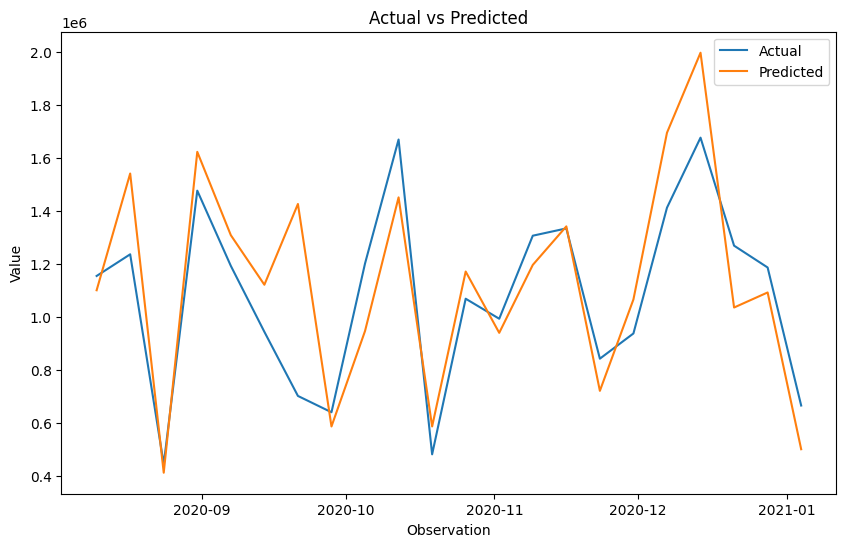

In [69]:
import matplotlib.pyplot as plt

# Plotting the predicted and actual values
plt.figure(figsize=(10, 6))
plt.plot(results_test.index, results_test['Actual'], label='Actual')
plt.plot(results_test.index, results_test['Predicted'], label='Predicted')
plt.xlabel('Observation')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [29]:

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_df['Sales'], predicted_values))
print("Root Mean Squared Error (RMSE):", rmse)

from sklearn.metrics import r2_score

r2 = r2_score(test_df['Sales'], predicted_values)
print("R-squared (R2) Score:", r2)



Root Mean Squared Error (RMSE): 229145.50430953476
R-squared (R2) Score: 0.7417068254177823


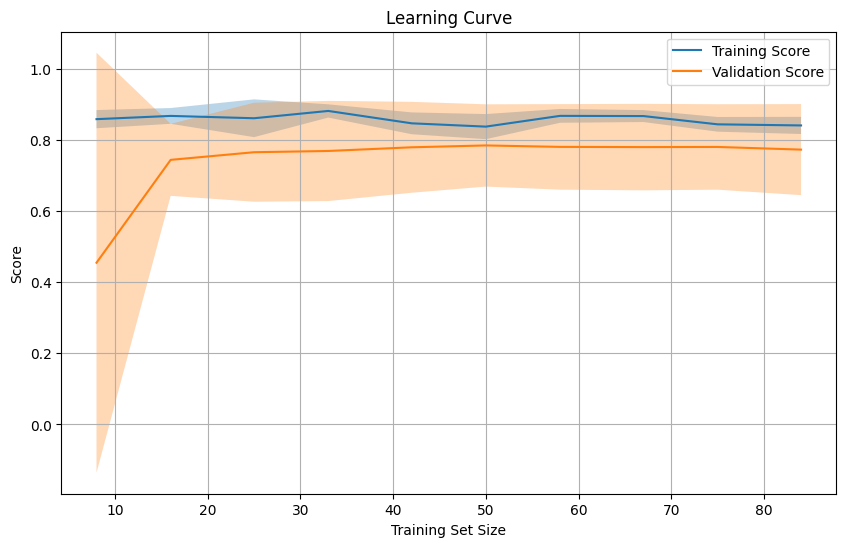

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Define the features and target variables
X = df[['ad_clicks']]
y = df['Sales']

# Create a linear regression model
model = LinearRegression()

# Define the range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=train_sizes, cv=5, scoring='r2')

# Calculate the mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation of test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Score')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()




The learning curve visualization suggests the following:

    Training Score (Blue Line): The training score represents the model's performance on the training set. It starts high (around 0.84) and remains relatively stable as the training set size increases. This indicates that the model can fit the training data well.

    Validation Score (Orange Line): The validation score represents the model's performance on the validation set, which serves as an estimate of how well the model generalizes to unseen data. The score starts lower (around 0.44) and improves as the training set size increases. However, it reaches a plateau at around 0.75 after a training set size of 15 and remains relatively level thereafter.

Interpretation:

    High Bias: The fact that the training score is consistently higher than the validation score suggests that the model may have a slight bias or underfitting. This is indicated by the gap between the two scores, which implies that the model is not capturing all the patterns in the data.
    Good Generalization: The stability of the training score and the improvement of the validation score as the training set size increases indicate that the model generalizes well to unseen data. The fact that the validation score reaches a plateau suggests that providing more training data may not significantly improve the model's performance.

Overall, the learning curve suggests that the model is performing reasonably well and has a good balance between bias and variance. It captures the underlying patterns in the data and generalizes well to unseen data. However, there might be some room for improvement, such as exploring more complex models or incorporating additional features to potentially enhance the model's performance.

## Model Assumptions

- Linearity: The relationship between the features and target variable should be linear.

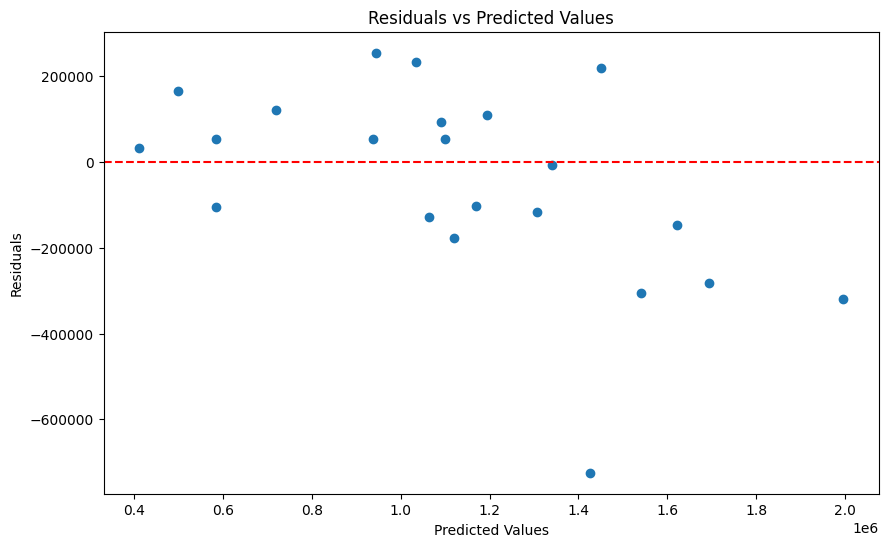

In [70]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = results_test['Actual'] - results_test['Predicted']

# Plotting the residuals against the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results_test['Predicted'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()






Independence of Residuals: The residuals should be independent of each other. If the residuals are not independent of each other, then the model is not capturing some explanatory information.

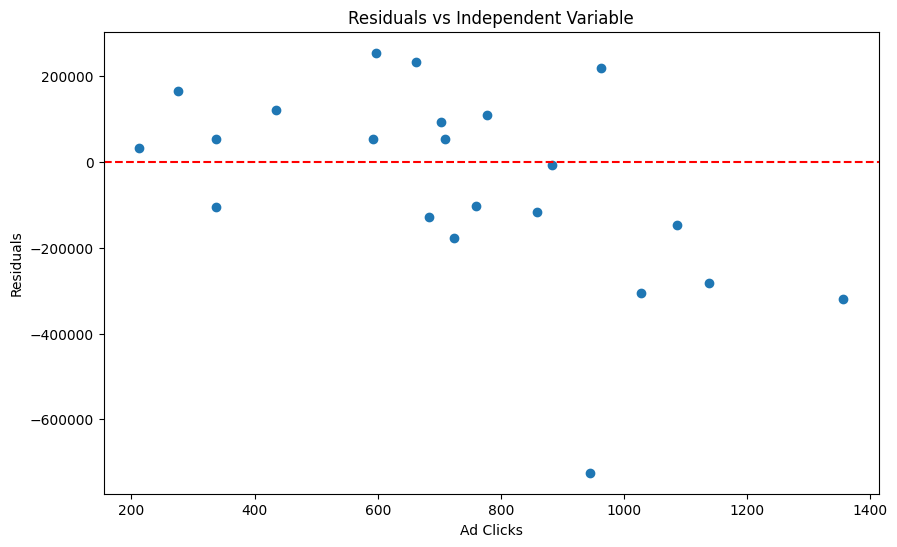

In [71]:
import matplotlib.pyplot as plt

# Plotting the residuals against the independent variable
plt.figure(figsize=(10, 6))
plt.scatter(X_test['ad_clicks'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Ad Clicks')
plt.ylabel('Residuals')
plt.title('Residuals vs Independent Variable')
plt.show()


If the scatter plot of residuals against the independent variable(s) shows the dots scattered randomly and equally above and below the zero line (red dashed line), it suggests that there is no clear pattern or correlation between the residuals and the independent variable. This is a positive indication that the independence assumption is likely satisfied.

The scattered distribution of the dots indicates that the residuals are randomly distributed with respect to the independent variable(s), indicating independence. The fact that the dots are evenly distributed above and below the zero line suggests that the model is not systematically overestimating or underestimating the response variable based on the independent variable(s).

Overall, this scatter plot suggests that the independence assumption is met, indicating that the residuals are independent of the independent variable(s) and no significant patterns or correlations remain in the model.

It is important to note that this interpretation is based on the assumption that there are no other relevant factors influencing the residuals or introducing dependence. Therefore, it is always recommended to consider additional checks and diagnostics to ensure the independence assumption is valid in your specific regression model.

If there is a single data point that is well below the red dashed line and almost touching the x-axis line, it may indicate that there is an outlier or influential point in the data. This data point has a larger residual compared to the other data points, suggesting that it may have a significant impact on the model's fit.

It is important to investigate this outlier further to determine its cause and whether it should be included or excluded from the analysis. Some possible explanations for an outlier could be data entry errors, measurement errors, or extreme observations that are genuinely different from the rest of the data.

You can examine the specific data point and investigate its characteristics, such as its corresponding values for the independent variable(s) and dependent variable. It's also a good idea to evaluate whether the removal of this outlier improves the overall fit and performance of the model.

Keep in mind that the decision to include or exclude outliers should be based on careful consideration of the data and the specific context of the analysis. It's important to strike a balance between achieving a better fit and maintaining the integrity of the data.


Homoscedasticity: The variance of the residuals is constant across all values of the target variable.

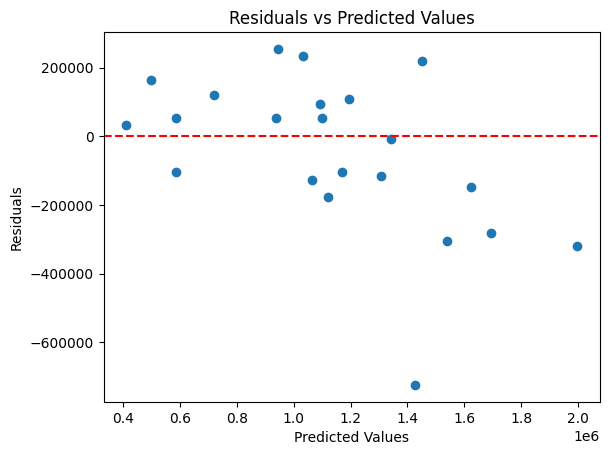

In [72]:
# Calculate the residuals
residuals = y_test - predicted_values_test

# Create a scatter plot of residuals against predicted values or independent variable(s)
plt.scatter(predicted_values_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


If the scatter plot of residuals against predicted values or independent variable(s) shows a fan-shaped pattern, it indicates the presence of heteroscedasticity. The spread of residuals tends to increase or decrease systematically as the predicted values or independent variable(s) change.

Interpreting this pattern of heteroscedasticity depends on the context of your specific analysis. Some possible interpretations could be:

1. Increasing Variance: If the spread of residuals widens as the predicted values or independent variable(s) increase, it suggests that the model's errors have higher variability for larger predicted values. This could imply that the model is less reliable or accurate for predicting higher values.

2. Decreasing Variance: Conversely, if the spread of residuals narrows as the predicted values or independent variable(s) increase, it suggests that the model's errors have lower variability for larger predicted values. This could imply that the model is more reliable or accurate for predicting higher values.

3. Heterogeneous Effects: The fan-shaped pattern could also indicate that the impact of the independent variable(s) on the outcome variable varies across different ranges or levels of the independent variable(s). This suggests that the relationship between the independent variable(s) and the outcome variable is not constant, but rather changes in magnitude or direction.

In any case, the presence of heteroscedasticity indicates a violation of the assumption of constant variance of residuals, which can affect the reliability of the coefficient estimates and statistical inference. It may be necessary to address this issue by considering transformations of variables, using weighted least squares regression, or employing heteroscedasticity-robust standard errors to obtain valid statistical results.

It's important to further investigate the underlying reasons for heteroscedasticity and consider appropriate techniques to address it based on the specific context and goals of your analysis.

Normality of Residuals: The residuals should be normally distributed. If the residuals are not normally distributed, the model may not have captured all the explanatory information and may be missing some features.

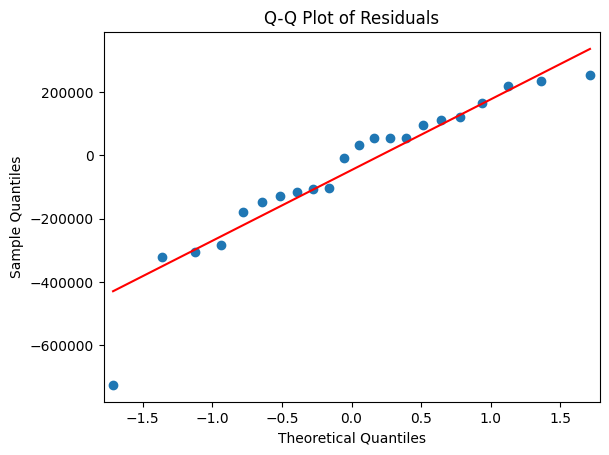

In [73]:
# Creating a Q-Q plot of the residuals
sm.qqplot(residuals, line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()


The Q-Q plot shows that the majority of the residuals in the linear regression model follow a reasonably straight line, suggesting approximate adherence to the assumption of normality. However, there is one outlier data point that deviates significantly from the expected pattern. This outlier is located near the intersection of the x and y axes, well below the red line.

This outlier could indicate a potential issue in the model, such as a data point with an unusually large residual or a significant deviation from the assumed linear relationship. It is important to investigate this outlier further to understand its nature and potential impact on the model's validity. This may involve examining the specific characteristics of the outlier data point, considering its potential influence on the regression results, and exploring possible explanations for its occurrence.

For an academic audience, this outlier serves as a reminder that while the majority of the residuals follow the expected pattern, there are instances where the assumptions of the linear regression model may not hold perfectly. It highlights the need for thorough data exploration, identification of influential observations, and robustness checks to ensure the reliability and generalizability of the model's findings.